<a href="https://colab.research.google.com/github/PaulToronto/Practical-Statistics-for-Data-Scientists-Notes/blob/main/4_Regression_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 Regression and Prediction

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Simple Linear Regression

### Key Terms

- **Response**: the term we are trying to predict ($Y$)
    - synonyms: dependent variable, Y variable, target, outcome
- **Independent variable**: the variable used to predict the response ($X$)
    - synonyms: X variable, feature, attribute, predictor
- **Record**: the vector of predictor and outcome values for a specific individual or case
    - synonyms: row, case, instance, example
- **Intercept**: the intercept of the regression line
    - that is the predicted value when $X = 0$
    - synonyms: $b_0$, $\beta_0$
- **Regression coefficient**
    - the slope of the regression line
    - synonyms: $b_1$, $\beta_1$
- **Fitted values**
    - the estimates $\hat{Y}_{i}$ obtained from the regression line
    - synonym: predicted values
- **Residuals**
    - the difference between the observed values and the fitted values
    - synonym: errors
- **Least Squares**:
    - the method of fitting a regression by minimizing the sum of squared residuals
    - synonyms: ordinary least squares, OLS


### The Regression Equation

$Y = b_0 + b_1X$

- simple linear regression estimates how much $Y$ will change when $X$ changes by a certain amount.

In [2]:
path = 'https://raw.githubusercontent.com/PaulToronto'
path += '/Practical-Statistics-for-Data-Scientists-Notes/main'
path += '/data/LungDisease.csv'

lung = pd.read_csv(path)
lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [3]:
lung.shape

(122, 2)

- *Exposure* is the number of years an worker was exposed to cotton dust
 - $X$
- *PEFR (peak expiratory flow rate)* is a measure of lung capacity
  - $Y$

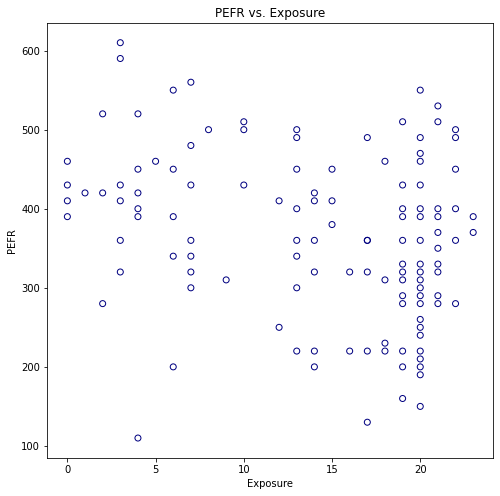

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(lung['Exposure'], 
            lung['PEFR'],
            marker='o', 
            facecolors='none',
            edgecolors='navy');
plt.title('PEFR vs. Exposure')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
 
plt.show()

In [5]:
model = LinearRegression()

predictors = ['Exposure']
outcome = 'PEFR'

model.fit(lung[predictors], lung[outcome])

LinearRegression()

In [6]:
model.intercept_

424.582806573957

In [7]:
model.coef_

array([-4.18457649])

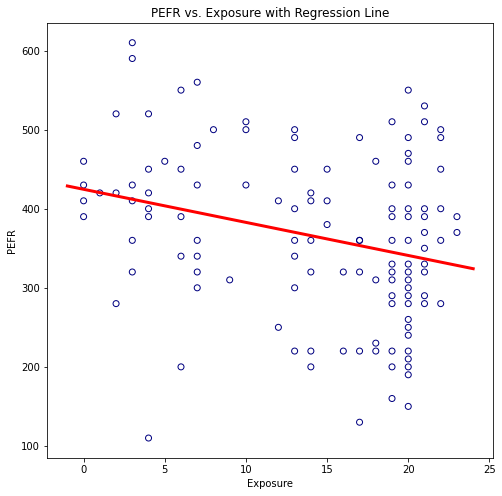

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(lung['Exposure'], 
            lung['PEFR'], 
            marker='o', 
            facecolors='none',
            edgecolors='navy')

# regression line
exposure = np.array([lung['Exposure'].min() - 1, lung['Exposure'].max() + 1])
y_hat = model.intercept_ + model.coef_[0] * exposure
plt.plot(exposure, y_hat, color='red', linewidth=3)

plt.title('PEFR vs. Exposure with Regression Line')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
 
plt.show()

### Fitted values and Residuals

- the fitted values are the predictions
- the residuals are the prediction errors

Because the data doesn't fall exactly on a line, the regression equation should include an explicit error term $e_i$

$Y_i = b_0 + b_1X_i + e_i$

The **fitted values** are denoted by:

$\hat{Y}_i = \hat{b}_0 + \hat{b}_1X_i$

The notation $\hat{b}_0$ and $\hat{b}_1$ indicates that the coefficients are estimated vs. known. 

We compute the **residuals** by subtracting the predicted values from the original data:

$\hat{e}_i = Y_i - \hat{Y}_i$

#### Computing the fitted values and the residuals

In [9]:
fitted = model.predict(lung[predictors])
fitted

array([424.58280657, 424.58280657, 424.58280657, 424.58280657,
       420.39823009, 416.2136536 , 416.2136536 , 416.2136536 ,
       412.02907712, 412.02907712, 412.02907712, 412.02907712,
       412.02907712, 412.02907712, 407.84450063, 407.84450063,
       407.84450063, 407.84450063, 407.84450063, 407.84450063,
       403.65992415, 399.47534766, 399.47534766, 399.47534766,
       399.47534766, 399.47534766, 395.29077118, 395.29077118,
       395.29077118, 395.29077118, 395.29077118, 395.29077118,
       395.29077118, 391.10619469, 386.9216182 , 382.73704172,
       382.73704172, 382.73704172, 374.36788875, 374.36788875,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       365.99873578, 365.99873578, 365.99873578, 365.99873578,
       365.99873578, 365.99873578, 361.81415929, 361.81415929,
       361.81415929, 357.62958281, 357.62958281, 353.44500632,
       353.44500632, 353.44500632, 353.44500632, 353.44

In [10]:
# verify with first principles
fitted - np.array((model.intercept_ + model.coef_[0] * lung[predictors])['Exposure'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [11]:
residuals = lung[outcome] - fitted
residuals

0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64

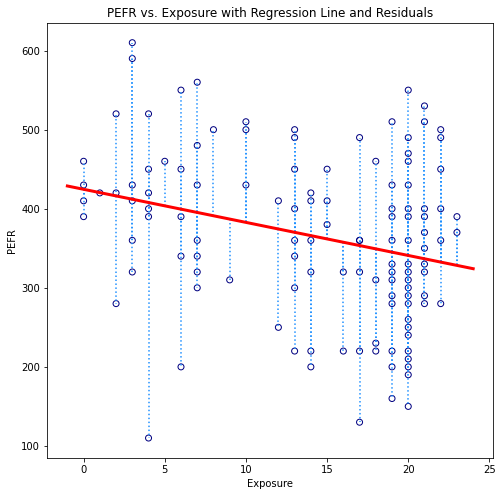

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(lung['Exposure'], 
            lung['PEFR'], 
            marker='o', 
            facecolors='none',
            edgecolors='navy')

# regression line
exposure = np.array([lung['Exposure'].min() - 1, lung['Exposure'].max() + 1])
y_hat = model.intercept_ + model.coef_[0] * exposure
plt.plot(exposure, y_hat, color='red', linewidth=3)

plt.vlines(lung['Exposure'], 
           fitted, 
           fitted + residuals,
           linestyle='dotted',
           color='dodgerblue')

plt.title('PEFR vs. Exposure with Regression Line and Residuals')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
 
plt.show()


### Least Squares

The regression line is the estimate that minimizes the sum of the squared residual values, aka the **residual sum of squares** or **RSS**

$$
\begin{align}
RSS &= \sum_{i=1}^{n}\left(Y_i - \hat{Y}_i\right)^2 \\
&= \sum_{i=1}^{n}\left(Y_i - \hat{b}_0 - \hat{b}_1X_i\right)^2
\end{align}
$$

- The estimates $\hat{b}_{0}$ and $\hat{b}_{1}$ are the valus that minimize $RSS$.

- The method of minimizing the sum of the squared residuals is termed **least squares regression** or **ordinary least squares (OLS) regression**. 

- Least squares regression is sensitive to outliers, which can be a significant problem in small or moderate-sized data sets. 

- Regression is used for:
    1. Prediction
    2. Explanation

## Multiple Linear Regression

$$
$$